# Fourier Converter

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import matplotlib as mpl
import sympy as smp
import cv2
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2, fftshift
import os
from os import listdir, remove, mkdir
from os.path import isdir, isfile
from PIL import Image

[[0.45264781 0.42682964 0.42460844 ... 0.28179509 0.26485268 0.27232955]
 [0.42175152 0.41651255 0.41074808 ... 0.28676831 0.27815691 0.27409748]
 [0.41288969 0.40507486 0.40454481 ... 0.31602833 0.35859969 0.31120685]
 ...
 [0.04854706 0.04854706 0.04854706 ... 0.2171327  0.22506775 0.20167542]
 [0.06162917 0.04465613 0.04854706 ... 0.21004783 0.20944275 0.21956483]
 [0.05689709 0.04856591 0.05246863 ... 0.21967299 0.21452593 0.21566299]]


True

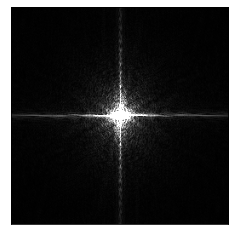

In [7]:
width = 256
imgnor = color.rgb2gray(io.imread('C:/testcam/datatest/fakerepic/170906.jpg'))
img = cv2.resize(imgnor ,(width,width))
#img = color.rgb2gray(io.imread('C:/Users/Windows 10/Downloads/fakerepic/172064.jpg'))
#img_FT = fft2(img)
#fy = np.fft.fftfreq(img.shape[0],d=100) #suppose the spacing between pixels is 10mm, for example
#fx = np.fft.fftfreq(img.shape[1],d=100)
#print('{:.2f} correponds to fx={:.6f} and fy={:.6f}'.format(img_FT[10,20], fx[20], fy[10]))
#plt.imshow(np.abs(img_FT), cmap='gray', vmax=20)
#plt.colorbar()
img_FFT = (fftshift(fft2(img)))
#plt.imshow(np.abs(img_FFT), cmap='gray', vmax=20), plt.xticks([]), plt.yticks([])
print(img)
plt.imshow(np.abs(img_FFT), cmap='gray', vmax=200), plt.xticks([]), plt.yticks([])
cv2.imwrite('C:/testcam/github/fourier_converter/imwritepicture/1.jpg', (np.abs(img_FFT)))

In [20]:
def convertpic():
    width = 640
    imgnor = color.rgb2gray(io.imread(a))
    img = cv2.resize(imgnor ,(width,width))
    #img = color.rgb2gray(io.imread('C:/Users/Windows 10/Downloads/fakerepic/172064.jpg'))
    img_FT = fft2(img)
    fy = np.fft.fftfreq(img.shape[0],d=100) #suppose the spacing between pixels is 10mm, for example
    fx = np.fft.fftfreq(img.shape[1],d=100)
    print('{:.2f} correponds to fx={:.6f} and fy={:.6f}'.format(img_FT[10,20], fx[20], fy[10]))
    plt.imshow(np.abs(img_FT), cmap='gray', vmax=200)
    plt.colorbar()
    
    img_FFT = (fftshift(fft2(img)))
    #img_FFT = np.abs(fftshift(fft2(img)))
    plt.imshow(np.abs(img_FFT), cmap='gray', vmax=200)
    plt.colorbar()
    
    img_FT_alt = np.copy(img_FT)
    img_FT_alt[-2:] = 0 
    img_FT_alt[:,-2:] = 0 
    img_FT_alt[:2] = 0 
    img_FT_alt[:,:2] = 0 
    img_alt = np.abs(ifft2(img_FT_alt))
    plt.imshow(img_alt, cmap='gray')
    plt.colorbar()
    
    plt.subplot(121),plt.imshow(cv2.resize((io.imread(a)),(width,width)))
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(np.abs(img_FFT), cmap='gray', vmax=200)
    plt.title('Fourier Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    cv2.imwrite('C:/testcam/github/fourier_converter/imwritepicture/fourier/2.jpg', (np.abs(img_FFT)))
    fig = plt.figure()

    ax2 = fig.add_subplot(1, 2, 1)
    ax2.set_title("Input Image")
    ax2.set_xticks([])
    ax2.set_yticks([])
    input_img = mpimg.imread(os.path.join('C:/testcam/github/fourier_converter/dataset', '2.jpg')) 
    ax2.imshow(input_img)

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title("Fourier Image")
    ax2.set_xticks([])
    ax2.set_yticks([])
    fourier_img = cv2.imread(os.path.join('C:/testcam/github/fourier_converter/imwritepicture/fourier', '2.jpg')) 
    ax2.imshow(fourier_img)

    # Save the full figure...
    fig.savefig('C:/testcam/github/fourier_converter/imwritepicture/inputandfourier/2.jpg')

    return

-384.34+218.95j correponds to fx=0.000313 and fy=0.000156


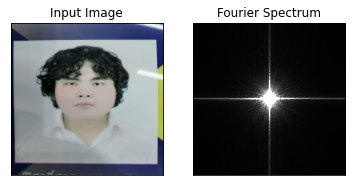

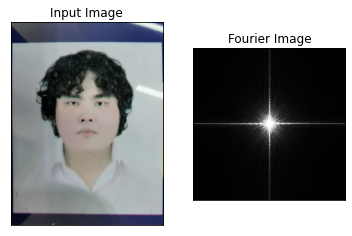

In [21]:
a = ('C:/testcam/datatest/fakerepic/170906.jpg')
convertpic()